# Hypothesis 2

1. Rename this notebook to correct name `2-Name_Surname.ipynb`
2. Fit 3 linear models for regression target `__price_doc`: Linear regression, Lasso, Ridge
    - Find optimal regularization coefficient for each model (select more than 10+ experiments)
3. Fit 3 linear models for classification target `__churn`: Logistic Regression without regularization, Log Reg + L1, Log Reg + L2
    - Find optimal regularization coefficient for each model (select more than 10+ experiments)
4. Fill table below with metrics for all models (Please hold this table in the top of notebook)
5. Select best model one for regression and classification task and add it prediction to submission dataset (see code below)
6. Send submission csv file to me

Notes:
- You can get up to 1 point
- Use all new features which you created in hypothesis 1
- Deadline 24 March 18.00

## Table with metrics 

In [65]:
import numpy as np
import pandas as pd

# table with metrics for all models
scoring = pd.DataFrame([
    ('Linear Regression', np.NaN, 'mean_squared_log_error', 0.1533),
    ('Lasso', 0.01, 'mean_squared_log_error', 0.1530),
    ('Ridge', 150, 'mean_squared_log_error', 0.1515),
    ('Logistic Regression', np.NaN, 'roc_auc_score', 0.9627),
    ('Log Reg + L1', 1, 'roc_auc_score', 0.9631),
    ('Log Reg + L2', 1, 'roc_auc_score', 0.9629),
    
], columns=['alg', 'regularization coef', 'metric_name', 'metric_value'])

scoring

,alg,regularization coef,metric_name,metric_value
0,Linear Regression,NaN,mean_squared_log_error,0.1533
1,Lasso,0.01,mean_squared_log_error,0.1530
2,Ridge,150.00,mean_squared_log_error,0.1515
3,Logistic Regression,NaN,roc_auc_score,0.9627
4,Log Reg + L1,1.00,roc_auc_score,0.9631
5,Log Reg + L2,1.00,roc_auc_score,0.9629


In [66]:
reg_model2 = Ridge(alpha=150)

reg_model2.fit(X_train, train['__price_doc'])

value = reg_model2.predict(X_sub)
value[value < 0] = 0
submission['__price_predict_best'] = value

In [67]:
log_model = LogisticRegression(max_iter=10000,penalty="l1", C=1,solver="liblinear")
log_model.fit(X_train, train['__churn'])

probs_test = log_model.predict_proba(X_train).T[1]
#probability of 1

for i in [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]:
    class_test=[]
    for j in probs_test:
        if j>i:
            class_test.append(1)
        else:
            class_test.append(0)
    accuracy=(class_test==train['__churn']).mean()
    print(f"accuracy for t-h: {i} is {accuracy}")

accuracy for t-h: 0.05 is 0.8153669724770642
accuracy for t-h: 0.1 is 0.8600917431192661
accuracy for t-h: 0.15 is 0.8813073394495413
accuracy for t-h: 0.2 is 0.8956422018348624
accuracy for t-h: 0.25 is 0.90625
accuracy for t-h: 0.3 is 0.9147075688073395
accuracy for t-h: 0.35 is 0.9184346330275229
accuracy for t-h: 0.4 is 0.9228784403669725
accuracy for t-h: 0.45 is 0.9233084862385321
accuracy for t-h: 0.5 is 0.9227350917431193
accuracy for t-h: 0.55 is 0.9217316513761468
accuracy for t-h: 0.6 is 0.9208715596330275
accuracy for t-h: 0.65 is 0.9174311926605505
accuracy for t-h: 0.7 is 0.9128440366972477
accuracy for t-h: 0.75 is 0.9055332568807339
accuracy for t-h: 0.8 is 0.8995126146788991
accuracy for t-h: 0.85 is 0.8900516055045872
accuracy for t-h: 0.9 is 0.8760034403669725
accuracy for t-h: 0.95 is 0.8616685779816514


In [68]:
boba_fett = log_model.predict_proba(X_sub).T[1]

In [69]:
boba_fett

array([8.50855038e-01, 6.62726101e-04, 1.36687776e-03, ...,
       3.16057839e-05, 8.45861658e-02, 1.17134882e-01])

In [70]:
boba_fett[boba_fett > 0.45] = 1
boba_fett[boba_fett <= 0.45] = 0

In [71]:
submission['__churn_predict_best'] = boba_fett

## Select best models

In [72]:
def alg1(x):
    """
    Algorithm version 1
    """
    return x['__price_predict']

# _, _, tuple_submission = X_y_datasets
# _, _, submission = tuple_submission

final_score = (
    submission[['__churn_predict_best', '__price_predict_best']]
    .rename(columns={
        '__churn_predict_best': '__churn_prob',
        '__price_predict_best': '__price_predict',
    })
)
final_score['__priority'] = final_score.apply(alg1, axis=1)
# select only 3 features
final_score = final_score[['__price_predict', '__churn_prob', '__priority']]
print(final_score.columns.tolist())
print(final_score.shape)
assert final_score.shape == (9988, 3)
assert final_score.columns.tolist() == ['__price_predict', '__churn_prob', '__priority']
final_score.to_csv('2-Mariia_Dmitrieva.csv', index=False)

['__price_predict', '__churn_prob', '__priority']
(9988, 3)


# ML model

In [42]:
import pandas as pd
import numpy as np

pd.set_option('mode.chained_assignment', None)
pd.options.display.max_rows = 100

train_raw = pd.read_csv('train_corr.csv')
submission = pd.read_csv('test_corr.csv')

In [43]:
train_raw.head().T

,0,1,2,3,4
max_floor,9.0,9.0,9.0,9.0,9.0
state,2.0,2.0,2.0,2.0,2.0
marital_status,Single,Married,Single,Married,Married
big_market_raion,no,no,no,no,no
total_revolving_bal,1906,12,658,0,1706
...,...,...,...,...,...
f__incineration_raion_yes,0.0,0.0,0.0,0.0,0.0
f__detention_facility_raion_no,1.0,1.0,1.0,0.0,1.0
f__detention_facility_raion_yes,0.0,0.0,0.0,1.0,0.0
f__railroad_terminal_raion_no,1.0,1.0,1.0,1.0,1.0


# Select prepared features only

In [44]:
remove_features = train_raw.columns[train_raw.columns.str.startswith('__')].tolist()
remove_features

['__churn', '__price_doc']

In [45]:
final_features = [c for c in train_raw.columns if c.startswith('f_')]
# tmp = (train_raw[final_features].dtypes != 'object')
# final_features = tmp[tmp == True].index.tolist()
final_features

['f__max_floor',
 'f__state',
 'f__total_revolving_bal',
 'f__market_count_1500',
 'f__leisure_count_3000',
 'f__total_ct_chng_q4_q1',
 'f__railroad_station_walk_km',
 'f__contacts_count_12_mon',
 'f__0_17_all',
 'f__trc_count_2000',
 'f__build_count_wood',
 'f__credit_limit',
 'f__total_trans_ct',
 'f__leisure_count_5000',
 'f__life_sq',
 'f__cafe_count_1000_price_1000',
 'f__mkad_km',
 'f__school_education_centers_top_20_raion',
 'f__avg_utilization_ratio',
 'f__public_transport_station_min_walk',
 'f__customer_age',
 'f__detention_facility_km',
 'f__sport_count_2000',
 'f__cafe_sum_1000_min_price_avg',
 'f__total_amt_chng_q4_q1',
 'f__metro_km_walk',
 'f__office_sqm_5000',
 'f__total_trans_amt',
 'f__months_inactive_12_mon',
 'f__cafe_sum_1500_min_price_avg',
 'f__floor',
 'f__num_room',
 'f__months_on_book',
 'f__dependent_count',
 'f__avg_open_to_buy',
 'f__build_year',
 'f__full_sq',
 'f__total_relationship_count',
 'f__build_count_mix',
 'f__marital_status_Married',
 'f__marital

# Split dataset for Train, Test and Submission 

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

RANDOM_STATE = 47

train, test = train_test_split(train_raw, test_size=0.5, random_state=RANDOM_STATE)
train.shape, test.shape, submission.shape

((6976, 147), (6977, 147), (9988, 145))

In [47]:
X_train = train[final_features].fillna(0).copy(True)
X_test = test[final_features].fillna(0).copy(True)
X_sub = submission[final_features].fillna(0).copy(True)

# list in which we store a set of different datasets for training and evaluating the model
# (dataset name, training set of features, deferred set of features)
# the training dataset should come first
X_y_datasets = [
    ('train', X_train, train),
    ('test', X_test, test),
    ('submission', X_sub, submission)]

X_train.shape, X_test.shape, X_sub.shape

((6976, 86), (6977, 86), (9988, 86))

# Train Linear Model

In [48]:
from sklearn.linear_model import LinearRegression


reg_model = LinearRegression()
reg_model.fit(X_train, train['__price_doc'])

for name, X_, y_ in X_y_datasets:
    value = reg_model.predict(X_)
    # zeroize forecast values if they are below 0
    value[value < 0] = 0
    y_['__price_predict_linreg'] = value
    

In [49]:
from sklearn.metrics import mean_squared_log_error

print('Metric mean_squared_log_error https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error')
for name, X_, y_ in X_y_datasets:
    if '__price_doc' in y_.columns:
        value = mean_squared_log_error(y_true=y_['__price_doc'], y_pred=y_['__price_predict_linreg'])
        print(f'{name:10s}: {value:.4f}')

Metric mean_squared_log_error https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error
train     : 0.1396
test      : 0.1533


In [50]:
reg_importances = pd.Series(reg_model.coef_, index=X_train.columns)
reg_importances

f__max_floor                                1.865104e-01
f__state                                    2.247268e-01
f__total_revolving_bal                     -7.240659e-02
f__market_count_1500                        9.755468e-02
f__leisure_count_3000                       6.474081e-01
f__total_ct_chng_q4_q1                      3.008610e-02
f__railroad_station_walk_km                -9.551544e-02
f__contacts_count_12_mon                    1.581295e-02
f__0_17_all                                 1.135353e-02
f__trc_count_2000                           1.818470e-01
f__build_count_wood                         3.981956e-01
f__credit_limit                             1.215091e-01
f__total_trans_ct                          -8.854212e-03
f__leisure_count_5000                      -4.285516e-01
f__life_sq                                  7.143603e-01
f__cafe_count_1000_price_1000               5.664975e-01
f__mkad_km                                  2.338294e-01
f__school_education_centers_top

<AxesSubplot:>

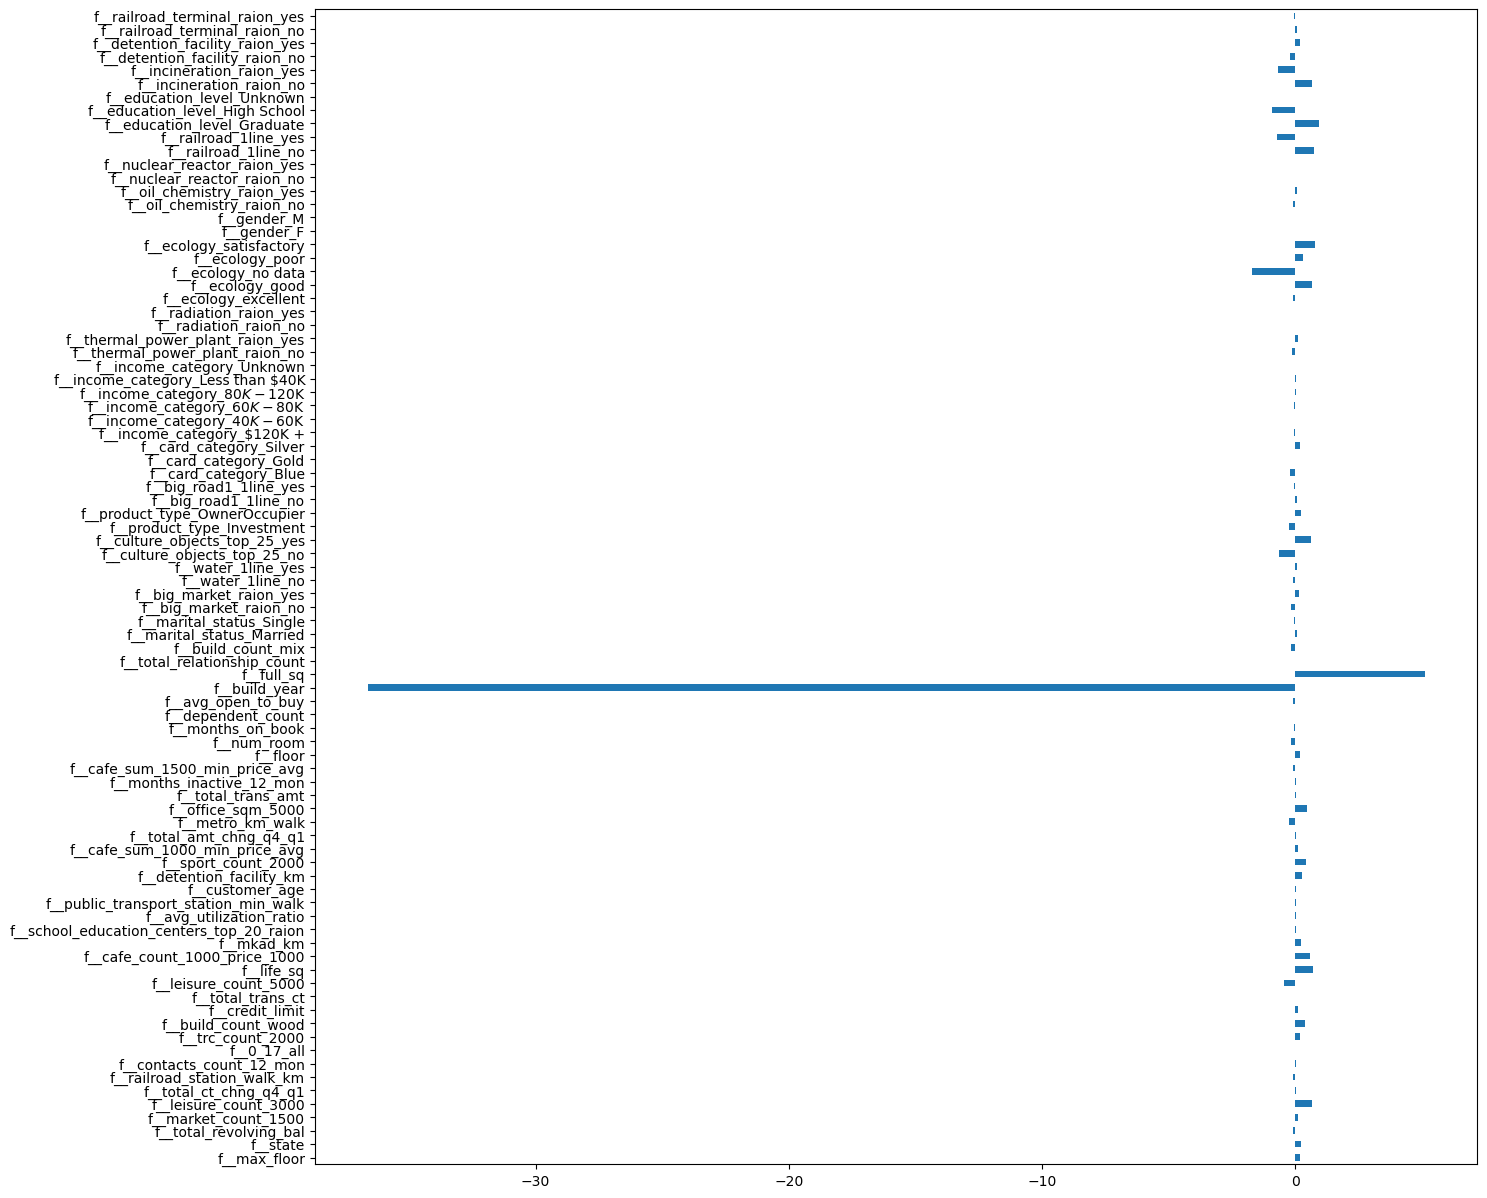

In [51]:
reg_importances.plot(kind='barh', figsize=(15, 15))

# Train Linear regression with L2 regularization

In [52]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_log_error


for alpha in [40,50, 60, 70, 80, 90, 100, 110, 120, 130, 140,150,160,170,180,190,200]:

    print(f'\nalpha {alpha}')
    reg_model2 = Ridge(alpha=alpha)
    # 
    # reg_model3 = Lasso(alpha=alpha)
    reg_model2.fit(X_train, train['__price_doc'])

    for name, X_, y_ in X_y_datasets:
        value = reg_model2.predict(X_)
        value[value < 0] = 0
        y_['__price_predict_ridge'] = value
    
    for name, X_, y_ in X_y_datasets:
        if '__price_doc' in y_.columns:
            value = mean_squared_log_error(y_true=y_['__price_doc'], y_pred=y_['__price_predict_ridge'])
            print(f'{name:10s}: {value:.4f}')
        


alpha 40
train     : 0.1387
test      : 0.1523

alpha 50
train     : 0.1385
test      : 0.1521

alpha 60
train     : 0.1384
test      : 0.1520

alpha 70
train     : 0.1383
test      : 0.1519

alpha 80
train     : 0.1383
test      : 0.1518

alpha 90
train     : 0.1382
test      : 0.1517

alpha 100
train     : 0.1382
test      : 0.1517

alpha 110
train     : 0.1382
test      : 0.1516

alpha 120
train     : 0.1382
test      : 0.1516

alpha 130
train     : 0.1382
test      : 0.1515

alpha 140
train     : 0.1382
test      : 0.1515

alpha 150
train     : 0.1381
test      : 0.1515

alpha 160
train     : 0.1382
test      : 0.1515

alpha 170
train     : 0.1382
test      : 0.1515

alpha 180
train     : 0.1382
test      : 0.1515

alpha 190
train     : 0.1382
test      : 0.1516

alpha 200
train     : 0.1383
test      : 0.1516


In [53]:
ridge_importances = pd.Series(reg_model2.coef_, index=X_train.columns)
ridge_importances

f__max_floor                                0.199090
f__state                                    0.189994
f__total_revolving_bal                     -0.053864
f__market_count_1500                        0.108819
f__leisure_count_3000                       0.238706
f__total_ct_chng_q4_q1                      0.032978
f__railroad_station_walk_km                -0.009131
f__contacts_count_12_mon                    0.016983
f__0_17_all                                 0.092565
f__trc_count_2000                           0.234769
f__build_count_wood                         0.277524
f__credit_limit                             0.093932
f__total_trans_ct                          -0.012441
f__leisure_count_5000                      -0.138264
f__life_sq                                  1.024913
f__cafe_count_1000_price_1000               0.444634
f__mkad_km                                  0.094662
f__school_education_centers_top_20_raion    0.047837
f__avg_utilization_ratio                    0.

<AxesSubplot:>

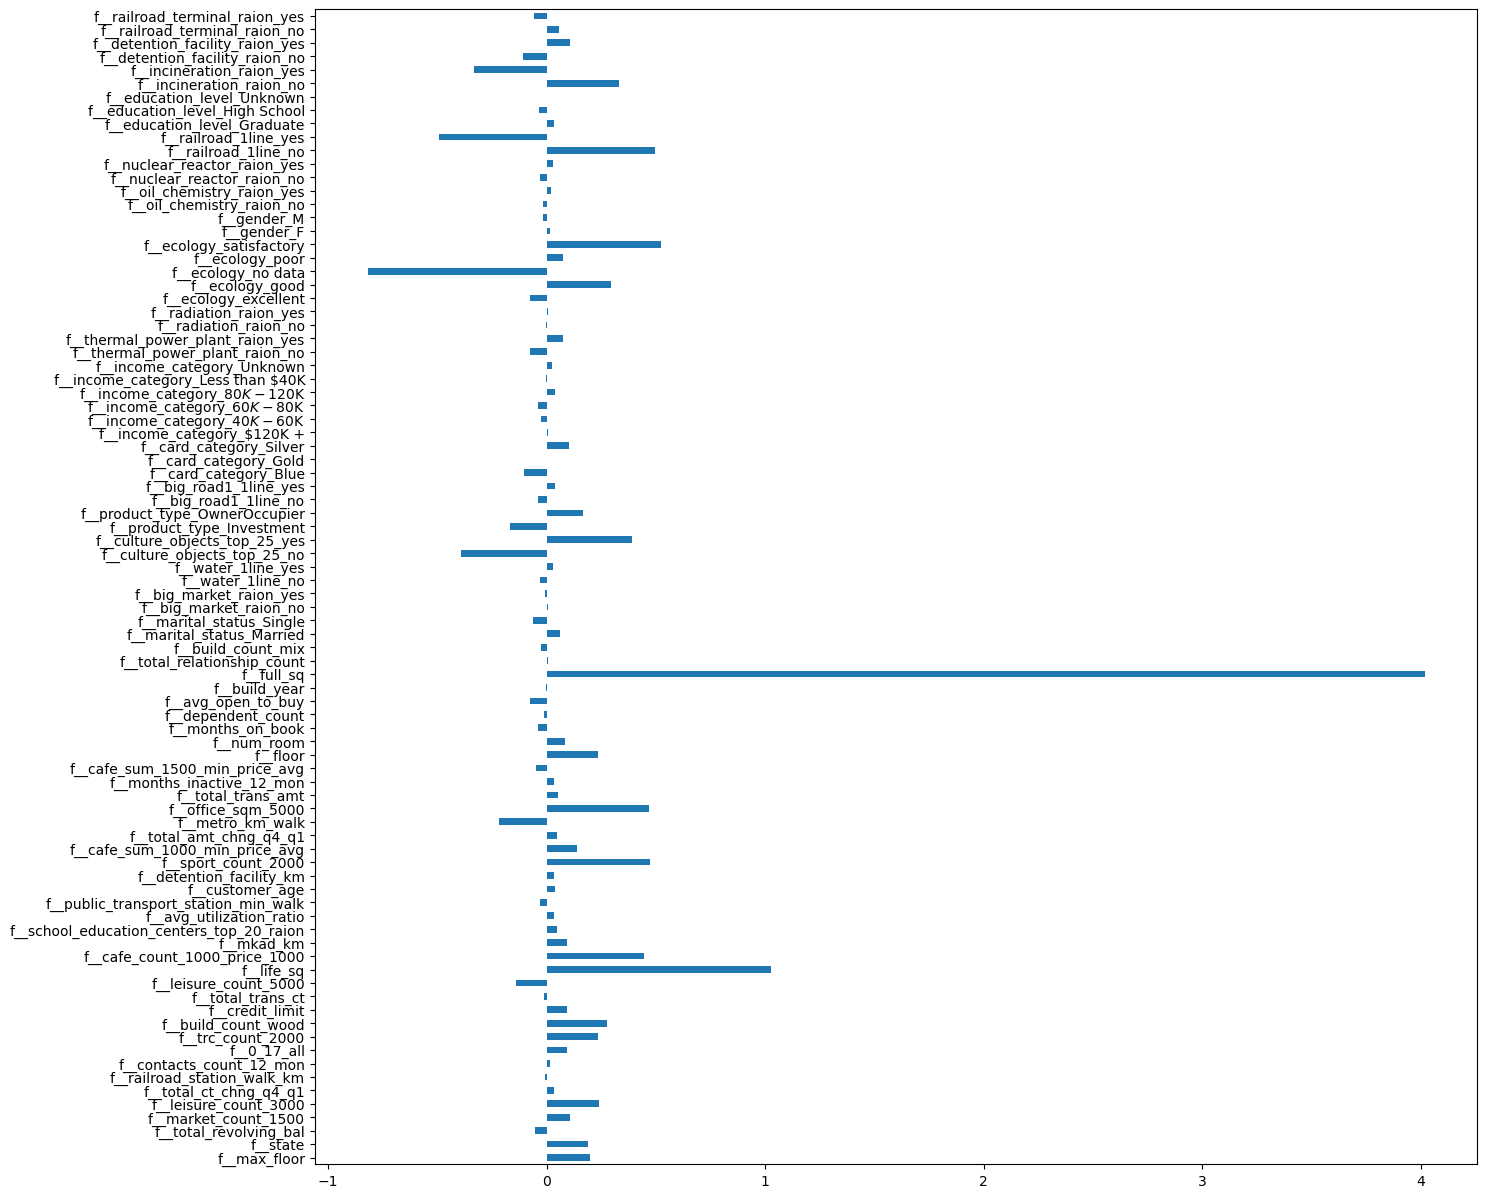

In [54]:
ridge_importances.plot(kind='barh', figsize=(15, 15))

In [55]:
for alpha in [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01]:

    print(f'\nalpha {alpha}')
    reg_model3 = Lasso(alpha=alpha)
    
    reg_model3.fit(X_train, train['__price_doc'])

    for name, X_, y_ in X_y_datasets:
        value = reg_model3.predict(X_)
        value[value < 0] = 0
        y_['__price_predict_lasso'] = value
    
    for name, X_, y_ in X_y_datasets:
        if '__price_doc' in y_.columns:
            value = mean_squared_log_error(y_true=y_['__price_doc'], y_pred=y_['__price_predict_lasso'])
            print(f'{name:10s}: {value:.4f}')
        


alpha 0.001
train     : 0.1395
test      : 0.1531

alpha 0.002
train     : 0.1394
test      : 0.1530

alpha 0.003
train     : 0.1393
test      : 0.1530

alpha 0.004
train     : 0.1393
test      : 0.1530

alpha 0.005
train     : 0.1392
test      : 0.1530

alpha 0.006
train     : 0.1392
test      : 0.1530

alpha 0.007
train     : 0.1392
test      : 0.1530

alpha 0.008
train     : 0.1392
test      : 0.1530

alpha 0.009
train     : 0.1392
test      : 0.1530

alpha 0.01
train     : 0.1392
test      : 0.1530


In [34]:
lasso_importances = pd.Series(reg_model3.coef_, index=X_train.columns)
lasso_importances

f__max_floor                                1.528659e-01
f__state                                    1.749334e-01
f__total_revolving_bal                     -3.095679e-02
f__market_count_1500                        9.291339e-02
f__leisure_count_3000                       0.000000e+00
f__total_ct_chng_q4_q1                      1.638578e-02
f__railroad_station_walk_km                -0.000000e+00
f__contacts_count_12_mon                    1.079077e-02
f__0_17_all                                 5.785291e-02
f__trc_count_2000                           1.812986e-01
f__build_count_wood                         2.205552e-01
f__credit_limit                             1.453786e-02
f__total_trans_ct                          -0.000000e+00
f__leisure_count_5000                      -0.000000e+00
f__life_sq                                  6.038817e-01
f__cafe_count_1000_price_1000               5.476717e-01
f__mkad_km                                  5.205839e-02
f__school_education_centers_top

<AxesSubplot:>

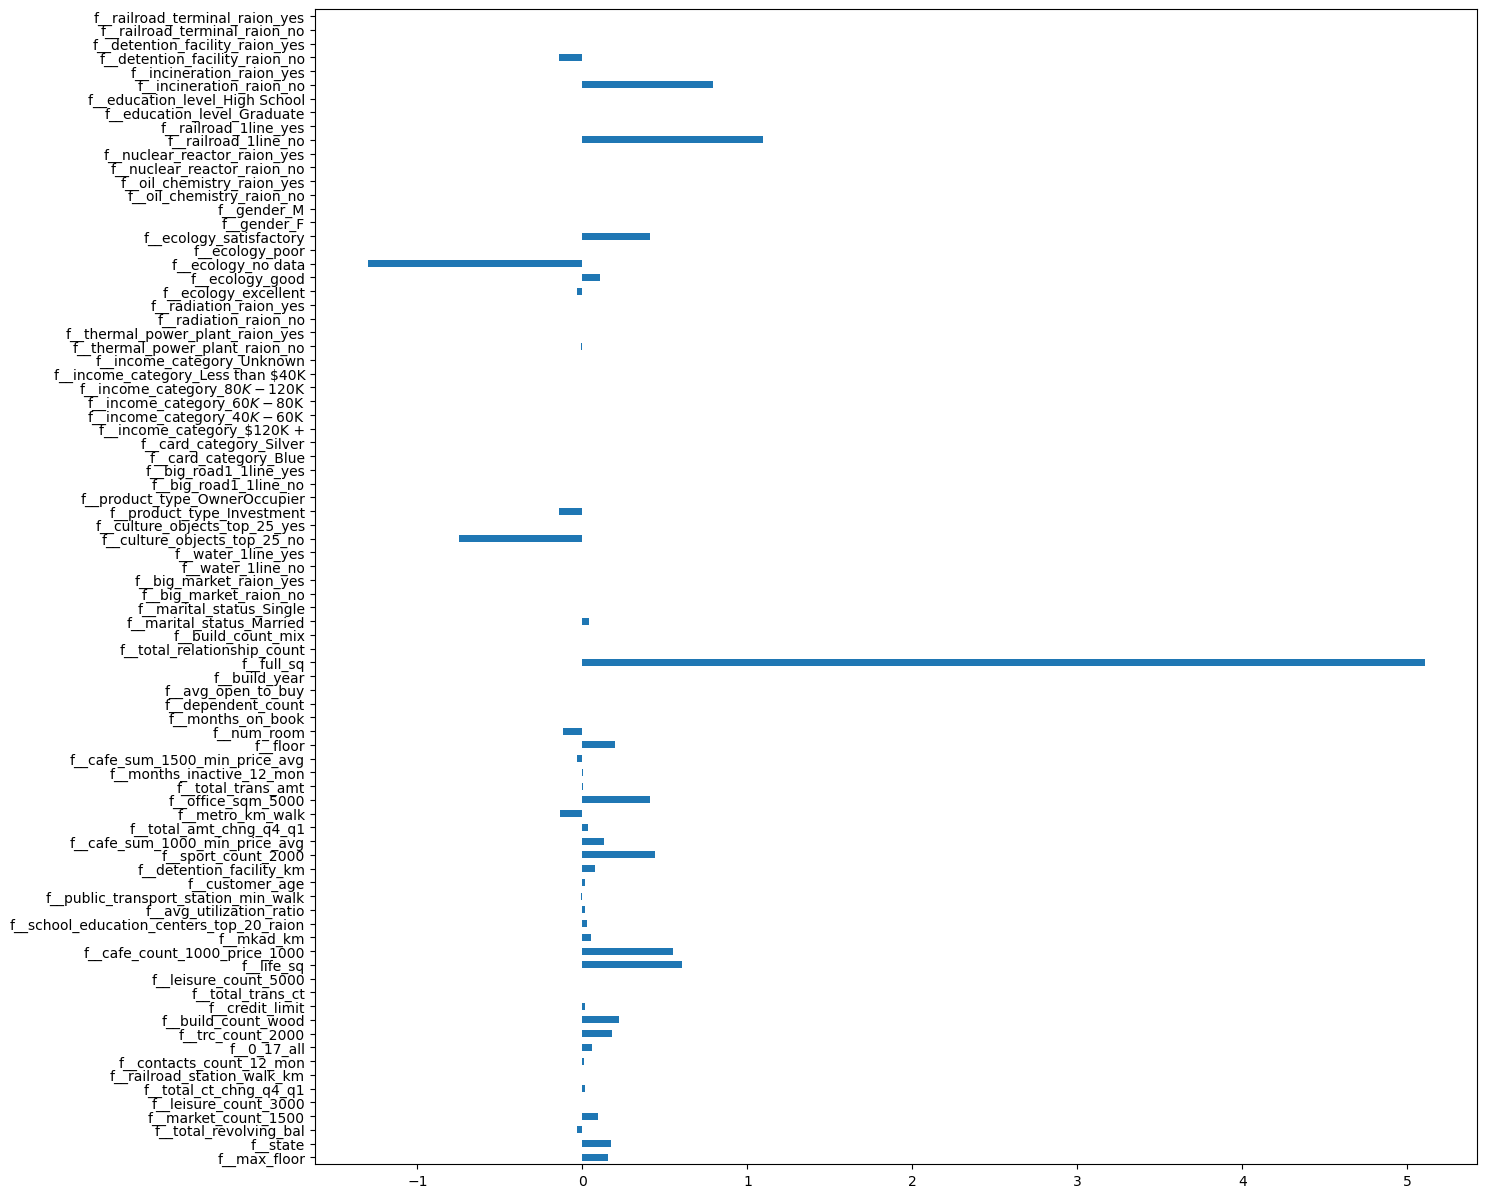

In [35]:
lasso_importances.plot(kind='barh', figsize=(15, 15))

# Train Logistic regression

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [60]:
log_model = LogisticRegression(max_iter=1000,penalty="none")
log_model.fit(X_train, train['__churn'])

for name, X_, y_ in X_y_datasets:
    prob = log_model.predict_proba(X_)
    y_['__churn_prob_logreg'] = prob[:, 1]


In [61]:
print('Metric Roc Auc https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html')
for name, X_, y_ in X_y_datasets:
    if '__churn' in y_.columns:
        value = roc_auc_score(y_true=y_['__churn'], y_score=y_['__churn_prob_logreg'])
        print(f'{name:10s}: {value:.4f}')

Metric Roc Auc https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
train     : 0.9641
test      : 0.9627


In [63]:
for alpha in [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,1,10,20,30,40,50,60,70,80,90,
              100,200,300,400,500,600,700,800,900,1000]:
    
    print(f"for alpha: {alpha}")
    log_model = LogisticRegression(max_iter=10000,penalty="l1", C=alpha,solver="liblinear")
    log_model.fit(X_train, train['__churn'])

    for name, X_, y_ in X_y_datasets:
        prob = log_model.predict_proba(X_)
        y_['__churn_prob_logreg'] = prob[:, 1]

    for name, X_, y_ in X_y_datasets:
        if '__churn' in y_.columns:
            value = roc_auc_score(y_true=y_['__churn'], y_score=y_['__churn_prob_logreg'])
                
            print(f'{name:10s}: {value:.4f}')
    print("================")

for alpha: 0.001
train     : 0.8593
test      : 0.8650
for alpha: 0.002
train     : 0.9344
test      : 0.9323
for alpha: 0.003
train     : 0.9395
test      : 0.9369
for alpha: 0.004
train     : 0.9455
test      : 0.9435
for alpha: 0.005
train     : 0.9496
test      : 0.9479
for alpha: 0.006
train     : 0.9517
test      : 0.9501
for alpha: 0.007
train     : 0.9530
test      : 0.9516
for alpha: 0.008
train     : 0.9539
test      : 0.9525
for alpha: 0.009
train     : 0.9546
test      : 0.9532
for alpha: 0.01
train     : 0.9551
test      : 0.9538
for alpha: 1
train     : 0.9640
test      : 0.9631
for alpha: 10
train     : 0.9641
test      : 0.9629
for alpha: 20
train     : 0.9641
test      : 0.9628
for alpha: 30
train     : 0.9641
test      : 0.9628
for alpha: 40
train     : 0.9641
test      : 0.9628
for alpha: 50
train     : 0.9641
test      : 0.9628
for alpha: 60
train     : 0.9641
test      : 0.9628
for alpha: 70
train     : 0.9641
test      : 0.9628
for alpha: 80
train     : 0.9641
tes

In [64]:
for alpha in [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,1,10,20,30,40,50,60,70,80,90,
              100,200,300,400,500,600,700,800,900,1000]:
    
    print(f"for alpha: {alpha}")
    log_model = LogisticRegression(max_iter=10000,penalty="l2", C=alpha,solver="liblinear")
    log_model.fit(X_train, train['__churn'])

    for name, X_, y_ in X_y_datasets:
        prob = log_model.predict_proba(X_)
        y_['__churn_prob_logreg'] = prob[:, 1]

    for name, X_, y_ in X_y_datasets:
        if '__churn' in y_.columns:
            value = roc_auc_score(y_true=y_['__churn'], y_score=y_['__churn_prob_logreg'])
                
            print(f'{name:10s}: {value:.4f}')
    print("================")

for alpha: 0.001
train     : 0.9576
test      : 0.9566
for alpha: 0.002
train     : 0.9591
test      : 0.9583
for alpha: 0.003
train     : 0.9599
test      : 0.9592
for alpha: 0.004
train     : 0.9605
test      : 0.9598
for alpha: 0.005
train     : 0.9608
test      : 0.9602
for alpha: 0.006
train     : 0.9612
test      : 0.9606
for alpha: 0.007
train     : 0.9614
test      : 0.9608
for alpha: 0.008
train     : 0.9616
test      : 0.9611
for alpha: 0.009
train     : 0.9618
test      : 0.9613
for alpha: 0.01
train     : 0.9619
test      : 0.9614
for alpha: 1
train     : 0.9641
test      : 0.9629
for alpha: 10
train     : 0.9641
test      : 0.9628
for alpha: 20
train     : 0.9641
test      : 0.9628
for alpha: 30
train     : 0.9641
test      : 0.9628
for alpha: 40
train     : 0.9641
test      : 0.9628
for alpha: 50
train     : 0.9641
test      : 0.9628
for alpha: 60
train     : 0.9641
test      : 0.9628
for alpha: 70
train     : 0.9641
test      : 0.9628
for alpha: 80
train     : 0.9641
tes

In [58]:
threshold = 0.5

for name, X_, y_ in X_y_datasets:
    y_['__churn_threshold'] = threshold
    y_['__churn_pred'] = (y_['__churn_prob_logreg'] > y_['__churn_threshold']).astype(int)
train[['__churn_prob_logreg', '__churn_threshold', '__churn_pred', '__churn']].sample(5)

,__churn_prob_logreg,__churn_threshold,__churn_pred,__churn
4793,0.004705,0.5,0,0
5868,0.097374,0.5,0,0
2679,0.842396,0.5,1,1
5223,0.034299,0.5,0,0
13024,0.425177,0.5,0,1


In [59]:
from sklearn.metrics import confusion_matrix


confusion_matrix(y_true=test['__churn'], y_pred=test['__churn_pred'])

array([[5645,  220],
       [ 327,  785]], dtype=int64)

In [60]:
tn, fp, fn, tp = confusion_matrix(y_true=test['__churn'], y_pred=test['__churn_pred']).ravel()
tn, fp, fn, tp

(5645, 220, 327, 785)

# How work with `predict_proba` method

(Classification task / Logistic regression and ...)

In [61]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression

X, y = make_moons()

# create instance of model
clf = LogisticRegression(random_state=0)
# fit the model
clf.fit(X, y)

LogisticRegression(random_state=0)

In [62]:
clf.intercept_

array([0.23091673])

In [63]:
clf.coef_

array([[ 1.06658673, -3.05682471]])

In [64]:
# get prediction
probability = clf.predict_proba(X)
print(probability.shape)

(100, 2)


In [65]:
# print first 5 elements
# probability of zero and first class
print(probability[:5, :])

[[0.73678598 0.26321402]
 [0.07157393 0.92842607]
 [0.94575759 0.05424241]
 [0.28121081 0.71878919]
 [0.61945489 0.38054511]]


In [66]:
# split probability to separate variables
prob_0, prob_1 = probability[:, 0], probability[:, 1]
# sum of probabilities equat to 1
prob_0 + prob_1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [67]:
# set the threshold for model
threshold = 0.5
# set label = 1 when probability more than threshold otherwised label = 0
label = (prob_1 >= threshold).astype(int)
print(label)

[0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0
 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1]


In [68]:
clf.predict(X)

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [69]:
np.alltrue(label == clf.predict(X))

True